# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
from collections import Counter
import datetime
import wordcloud
import json
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_category_id.json
/kaggle/input/youtube-trend

# Dữ liệu

In [2]:
df = pd.read_csv("/kaggle/input/youtube-trending-video-dataset/US_youtube_trending_data.csv")
df.sample(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
86089,BsKtDfMjHEo,Rams vs. Seahawks Week 5 Highlights | NFL 2021,2021-10-08T03:47:12Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2021-10-10T00:00:00Z,[None],2206356,24218,756,3812,https://i.ytimg.com/vi/BsKtDfMjHEo/default.jpg,False,False,"Para más contenido de la NFL en Español, suscr..."
178685,ysJCTCQYJyg,BABYMONSTER (#2) - AHYEON (Live Performance),2023-01-15T15:00:37Z,UCQi67q4kGdmnJaRzX81uK5g,YG ENTERTAINMENT,10,2023-01-18T00:00:00Z,YG Entertainment|YG 와이지|케이팝|K pop|K-pop,7700810,289040,0,17524,https://i.ytimg.com/vi/ysJCTCQYJyg/default.jpg,False,False,#BABYMONSTER #베이비몬스터 #2nd_Member #AHYEON #아현 #...
64723,cQ4AZqAhsLA,GLITTER FACE MASK | Sydney Morgan #SHORTS,2021-06-18T16:21:49Z,UCPHuYCxf9QJArw-4ZXXC7Ig,Sydney Morgan,24,2021-06-24T00:00:00Z,[None],10612492,844508,18718,14632,https://i.ytimg.com/vi/cQ4AZqAhsLA/default.jpg,False,False,Thank you so much for watching!!! LETS BE FRIE...
133326,ktluMBr4VXM,Gervonta Tank Davis KOs Rolando Rolly Romero i...,2022-05-29T05:05:17Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,2022-06-05T00:00:00Z,Boxing|PBC|premier boxing champions|ko|tko|kno...,4199345,34595,0,6956,https://i.ytimg.com/vi/ktluMBr4VXM/default.jpg,False,False,Gervonta Davis said he wanted to deliver punis...
184935,awurBA-3qok,"Going 925,817,694 MPH in Roblox",2023-02-14T12:00:01Z,UCke6I9N4KfC968-yRcd5YRg,SSundee,20,2023-02-18T00:00:00Z,[None],1548982,49328,0,2431,https://i.ytimg.com/vi/awurBA-3qok/default.jpg,False,False,We break the sound barrier with speed in Roblo...


In [3]:
df.video_id.nunique()

36887

In [4]:
df.channelTitle.nunique()

7479

Trong notebook này, chúng ta sẽ tìm ra lời giải cho 4 câu hỏi chính:
1. Các danh xuất hiện trên xu hướng nói lên điều gì?
2. Tiêu đề có ảnh hưởng như thế nào đến việc một video được lên xu hướng?
3. Sự tương tác của người xem có mối tương quan như thế nào với việc một video được lên xu hướng?
4. Nên đăng video vào thời điểm nào để tăng khả năng được lên xu hướng?

In [5]:
import re
k = open("/kaggle/input/youtube-trending-video-dataset/IN_category_id.json").read()
Category_list = re.findall(r"title\": \"(.*)\"", k)
categories = {i+1:Category_list[i] for i in range(len(Category_list))}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 3: 'Music',
 4: 'Pets & Animals',
 5: 'Sports',
 6: 'Short Movies',
 7: 'Travel & Events',
 8: 'Gaming',
 9: 'Videoblogging',
 10: 'People & Blogs',
 11: 'Comedy',
 12: 'Entertainment',
 13: 'News & Politics',
 14: 'Howto & Style',
 15: 'Education',
 16: 'Science & Technology',
 17: 'Movies',
 18: 'Anime/Animation',
 19: 'Action/Adventure',
 20: 'Classics',
 21: 'Comedy',
 22: 'Documentary',
 23: 'Drama',
 24: 'Family',
 25: 'Foreign',
 26: 'Horror',
 27: 'Sci-Fi/Fantasy',
 28: 'Thriller',
 29: 'Shorts',
 30: 'Shows',
 31: 'Trailers'}

In [6]:
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    3: 'Music',
    4: 'Pets & Animals',
    5: 'Sports',
    6: 'Short Movies',
    7: 'Travel & Events',
    8: 'Gaming',
    9: 'Videoblogging',
    10: 'People & Blogs',
    11: 'Comedy',
    12: 'Entertainment',
    13: 'News & Politics',
    14: 'Howto & Style',
    15: 'Education',
    16: 'Science & Technology',
    17: 'Movies',
    18: 'Anime/Animation',
    19: 'Action/Adventure',
    20: 'Classics',
    21: 'Comedy',
    22: 'Documentary',
    23: 'Drama',
    24: 'Family',
    25: 'Foreign',
    26: 'Horror',
    27: 'Sci-Fi/Fantasy',
    28: 'Thriller',
    29: 'Shorts',
    30: 'Shows',
    31: 'Trailers',
}

In [7]:
# Loại bỏ outliers: do dữ liệu thu thập của Youtube có một số mẫu dữ liệu bị lỗi khiến view count = 0
df = df[df['view_count'] != 0]

In [8]:
df.video_id.nunique()

36871

In [9]:
df.channelTitle.nunique()

7478

In [10]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,203113.000000,2.031130e+05,2.031130e+05,203113.000000,2.031130e+05
mean,18.788108,2.511553e+06,1.289536e+05,1500.960347,1.069772e+04
std,6.757188,7.216123e+06,4.107520e+05,9227.532483,8.091065e+04
min,1.000000,5.835000e+03,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.783820e+05,1.855500e+04,0.000000,1.326000e+03
50%,20.000000,9.641520e+05,4.232900e+04,0.000000,2.915000e+03
75%,24.000000,2.158727e+06,1.051940e+05,809.000000,6.850000e+03
max,29.000000,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203113 entries, 0 to 203188
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           203113 non-null  object
 1   title              203113 non-null  object
 2   publishedAt        203113 non-null  object
 3   channelId          203113 non-null  object
 4   channelTitle       203113 non-null  object
 5   categoryId         203113 non-null  int64 
 6   trending_date      203113 non-null  object
 7   tags               203113 non-null  object
 8   view_count         203113 non-null  int64 
 9   likes              203113 non-null  int64 
 10  dislikes           203113 non-null  int64 
 11  comment_count      203113 non-null  int64 
 12  thumbnail_link     203113 non-null  object
 13  comments_disabled  203113 non-null  bool  
 14  ratings_disabled   203113 non-null  bool  
 15  description        198949 non-null  object
dtypes: bool(2), int64(5)

In [12]:
# Check the no.of records for a random video: yYIdRjv94uE
df[df.video_id=="yYIdRjv94uE"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
5605,yYIdRjv94uE,Behind the Scenes of My Sailor Photoshoot,2020-09-08T21:16:38Z,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2020-09-09T00:00:00Z,Kylie Cosmetics|Kylie Jenner|Makeup|BTS|Behind...,1286513,0,0,4643,https://i.ytimg.com/vi/yYIdRjv94uE/default.jpg,False,True,Come behind the scenes with me at the photosho...
5826,yYIdRjv94uE,Behind the Scenes of My Sailor Photoshoot,2020-09-08T21:16:38Z,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2020-09-10T00:00:00Z,Kylie Cosmetics|Kylie Jenner|Makeup|BTS|Behind...,2187564,0,0,6265,https://i.ytimg.com/vi/yYIdRjv94uE/default.jpg,False,True,Come behind the scenes with me at the photosho...
6050,yYIdRjv94uE,Behind the Scenes of My Sailor Photoshoot,2020-09-08T21:16:38Z,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2020-09-11T00:00:00Z,Kylie Cosmetics|Kylie Jenner|Makeup|BTS|Behind...,2544628,0,0,6638,https://i.ytimg.com/vi/yYIdRjv94uE/default.jpg,False,True,Come behind the scenes with me at the photosho...
6280,yYIdRjv94uE,Behind the Scenes of My Sailor Photoshoot,2020-09-08T21:16:38Z,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2020-09-12T00:00:00Z,Kylie Cosmetics|Kylie Jenner|Makeup|BTS|Behind...,2824745,0,0,6853,https://i.ytimg.com/vi/yYIdRjv94uE/default.jpg,False,True,Come behind the scenes with me at the photosho...
6507,yYIdRjv94uE,Behind the Scenes of My Sailor Photoshoot,2020-09-08T21:16:38Z,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2020-09-13T00:00:00Z,Kylie Cosmetics|Kylie Jenner|Makeup|BTS|Behind...,3004868,0,0,7028,https://i.ytimg.com/vi/yYIdRjv94uE/default.jpg,False,True,Come behind the scenes with me at the photosho...
6747,yYIdRjv94uE,Behind the Scenes of My Sailor Photoshoot,2020-09-08T21:16:38Z,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2020-09-14T00:00:00Z,Kylie Cosmetics|Kylie Jenner|Makeup|BTS|Behind...,3230226,0,0,7191,https://i.ytimg.com/vi/yYIdRjv94uE/default.jpg,False,True,Come behind the scenes with me at the photosho...


In [13]:
df.sample()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
130488,0oxZKXBvbOI,Nick Saban: Texas A&M ‘bought every player’ in...,2022-05-19T02:37:56Z,UCXovZWLiLAQwhc07L_TuHYQ,Alabama Crimson Tide on AL.com,17,2022-05-22T00:00:00Z,Alabama|Crimson Tide|Roll Tide|Alabama Footbal...,247690,1961,0,1939,https://i.ytimg.com/vi/0oxZKXBvbOI/default.jpg,False,False,Alabama head coach Nick Saban is asked about t...


In [14]:
df_maxViews = df.sort_values('view_count', ascending=False).drop_duplicates(['video_id'])
df_maxViews.sample(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
70142,mr7ZfX1E55g,Shakira - Don't Wait Up (Official Video),2021-07-16T14:00:13Z,UCGnjeahCJW1AF34HBmQTJ-Q,shakiraVEVO,10,2021-07-22T00:00:00Z,shakira|don’t wait up|don’t wait up official v...,7711881,270921,13113,33601,https://i.ytimg.com/vi/mr7ZfX1E55g/default.jpg,False,False,Shakira — Don’t Wait Up (Official Video)Music:...
182366,ArQSLqa91ig,700hp F-Body Camaro drag races LS-Swapped 240S...,2023-02-01T17:00:05Z,UCXlfi8sf6cKGQ8sOd0-yRuw,Hoonigan,2,2023-02-05T00:00:00Z,Hoonigan|hoonegan|hoon|hooning|cars|chevy cama...,451978,19839,0,1088,https://i.ytimg.com/vi/ArQSLqa91ig/default.jpg,False,False,See you at the The LA Coliseum on February 5th...
114180,grG41kS4MUA,STAYC(스테이씨) 'RUN2U' MV,2022-02-21T09:00:01Z,UCod5V2dpnpJLklGvVOv5FcQ,STAYC,24,2022-03-01T00:00:00Z,STAYC|스테이씨|수민|배수민|시은|박시은|아이사|이채영|채영|세은|윤세은|심자윤...,26925970,633884,0,42224,https://i.ytimg.com/vi/grG41kS4MUA/default.jpg,False,False,STAYC(스테이씨) The 2nd Mini Album[YOUNG-LUV.COM]...
88759,-HJeSs2XquQ,Bills vs. Titans Week 6 Highlights | NFL 2021,2021-10-19T03:41:04Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2021-10-23T00:00:00Z,[None],2319564,28425,750,5110,https://i.ytimg.com/vi/-HJeSs2XquQ/default.jpg,False,False,"Para más contenido de la NFL en Español, suscr..."
61778,h3m3BmvFA3c,Rainbow Six Extraction: Sprawl Teaser | Ubisof...,2021-06-07T16:00:29Z,UCBMvc6jvuTxH6TNo9ThpYjg,Ubisoft North America,20,2021-06-13T00:00:00Z,Rainbow Six Extraction|Extraction|Sprawl Tease...,289544,17844,278,1199,https://i.ytimg.com/vi/h3m3BmvFA3c/default.jpg,False,False,Unknown. Sentient. Consuming. See what awaits ...


In [15]:
df_minViews = df.sort_values('view_count', ascending=True).drop_duplicates(['video_id'])
df_minViews.sample(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
136604,gFVDsrnsiRo,NAYEON POP! M/V Teaser 1,2022-06-21T14:59:51Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2022-06-22T00:00:00Z,JYP Entertainment|JYP|TWICE|트와이스|TWICENAYEON|트...,2281238,362327,0,31494,https://i.ytimg.com/vi/gFVDsrnsiRo/default.jpg,False,False,NAYEON POP! M/V Teaser 1NAYEON The 1st Mini Al...
119067,ZLNM5V0wypU,Chiefs trade star WR Tyreek Hill to Dolphins –...,2022-03-23T19:01:07Z,UCFDidMd82mpDkKijLUqHp7A,The Herd with Colin Cowherd,17,2022-03-26T00:00:00Z,NFL|Football|breaking news|Nick Wright|Kansas ...,321449,4991,0,1395,https://i.ytimg.com/vi/ZLNM5V0wypU/default.jpg,False,False,First Thing’s First host Nick Wright joins Col...
200417,dOj2hVjwrUo,Trope Talk: Bathos,2023-05-05T15:00:19Z,UCodbH5mUeF-m_BsNueRDjcw,Overly Sarcastic Productions,27,2023-05-07T00:00:00Z,Funny|Summary|OSP|Overly Sarcastic Productions...,346228,28354,0,2146,https://i.ytimg.com/vi/dOj2hVjwrUo/default.jpg,False,False,You know how everybody has been complaining ab...
30418,SXJGTnVfJic,I See a Dreamer (Dream Team Original Song),2021-01-14T16:30:12Z,UCLCdyRg3u5O-EVP5p46QxcQ,CG5,10,2021-01-15T00:00:00Z,cg5|cg5 song|dream smp|dream song|dream smp an...,535102,61914,852,10362,https://i.ytimg.com/vi/SXJGTnVfJic/default.jpg,False,False,STREAM NOW! Links below!Apple Music ▶ coming s...
151797,nhs1I0KxwN4,Florida State Seminoles vs. LSU Tigers | Full ...,2022-09-05T03:22:50Z,UCzRWWsFjqHk1an4OnVPsl9g,ESPN College Football,17,2022-09-06T00:00:00Z,[None],397645,5394,0,1225,https://i.ytimg.com/vi/nhs1I0KxwN4/default.jpg,False,False,In the Florida State Seminoles' 24-23 win over...


In [16]:
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())

In [17]:
def fetch_video_category(value):
    return categories[value]
df_maxViews["Video_Category"]=df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"]=df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"]=df.categoryId.apply(fetch_video_category)

df.sample(5)
    

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Video_Category
181121,GcI0k8bRnEw,GRIZZLIES at WARRIORS | FULL GAME HIGHLIGHTS |...,2023-01-26T06:41:25Z,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2023-01-30T00:00:00Z,Basketball|G League|NBA|game-0022200726,2339770,26026,0,2674,https://i.ytimg.com/vi/GcI0k8bRnEw/default.jpg,False,False,"Never miss a moment with the latest news, tren...",Movies
182537,ykX6HHMYxdU,quaso,2023-02-01T15:09:41Z,UCQ8Nk1VgyMgM7Mx3sX8WhPw,Pringus McDingus,20,2023-02-06T00:00:00Z,[None],852079,104287,0,2688,https://i.ytimg.com/vi/ykX6HHMYxdU/default.jpg,False,False,a bit late to the party on this oneBackgrounds...,Classics
13150,M_3Y7spnp0E,Come and get these updates! Yasssss,2020-10-11T23:55:22Z,UCYsDxjD-eM63hsSJvjeyfMg,Nene Leakes,24,2020-10-16T00:00:00Z,the real housewives of atlanta|Nene Leakes|Cyn...,201658,13345,489,2007,https://i.ytimg.com/vi/M_3Y7spnp0E/default.jpg,False,False,Welcome to the Life of NeNE! Nene Leakes will ...,Family
191814,3DdUvoc7tJ4,How do vinyl records hold stereo sound?,2023-03-24T13:13:01Z,UCy0tKL1T7wFoYcxCe0xjN6Q,Technology Connections,28,2023-03-25T00:00:00Z,[None],253796,16972,0,1437,https://i.ytimg.com/vi/3DdUvoc7tJ4/default.jpg,False,False,We answer that question!Links 'n' stuff:Techno...,Thriller
102416,UFF9n8kdfUM,The Baby in Yellow! (Garry's Mod),2021-12-31T14:00:26Z,UCNaM4RXivTmW2UTo7RI34ew,JustJoeKing,20,2022-01-02T00:00:00Z,justjoeking|gmod sandbox|the baby in yellow|ye...,736978,17253,0,637,https://i.ytimg.com/vi/UFF9n8kdfUM/default.jpg,False,False,Banana Joe showcases the Baby in Yellow Mod in...,Classics


### Tổng số video theo danh mục

In [18]:
df.Video_Category.value_counts()

Family              40633
Classics            39873
People & Blogs      33381
Movies              22881
Documentary         17553
Drama               10617
Film & Animation     8001
Foreign              7534
Thriller             6118
Horror               5466
Sci-Fi/Fantasy       4963
Autos & Vehicles     3922
Action/Adventure     1134
Education             923
Shorts                114
Name: Video_Category, dtype: int64

# Phân tích dữ liệu

## Các danh mục xuất hiện trên xu hướng

In [19]:
df_Views_Analysis = df_maxViews.groupby('Video_Category')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('Video_Category')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes

df_Comments = df_maxViews.groupby('Video_Category')['comment_count'].sum().reset_index()
df_Views_Analysis['Comments'] = df_Comments['comment_count']

df_Views_Analysis['Like_Rate'] = df_Views_Analysis['Likes'] / df_Views_Analysis['view_count']
df_Views_Analysis['Dislike_Rate'] = df_Views_Analysis['Dislikes'] / df_Views_Analysis['view_count']
df_Views_Analysis['Comment_Rate'] = df_Views_Analysis['Comments'] / df_Views_Analysis['view_count']
df_Views_Analysis['Positive_Res'] = df_Views_Analysis['Likes'] / (df_Views_Analysis['Likes'] + df_Views_Analysis['Dislikes'])

df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Comments,Like_Rate,Dislike_Rate,Comment_Rate,Positive_Res
0,Action/Adventure,254061862,12449300,66906,635160,0.049001,0.000263,0.002500,0.994654
1,Autos & Vehicles,812634440,33806080,293753,2691299,0.041601,0.000361,0.003312,0.991386
2,Classics,13433285534,665982283,7138657,47609358,0.049577,0.000531,0.003544,0.989395
3,Documentary,6401348953,345930758,5937492,20324394,0.054040,0.000928,0.003175,0.983126
4,Drama,3436743114,236863033,2198626,11172455,0.068921,0.000640,0.003251,0.990803
5,Education,250803716,10189794,85988,621953,0.040629,0.000343,0.002480,0.991632
6,Family,21911711291,1005949441,10745463,59801670,0.045909,0.000490,0.002729,0.989431
7,Film & Animation,3891920577,146918160,1287358,9927651,0.037750,0.000331,0.002551,0.991314
8,Foreign,2093035112,28474472,1721492,7130958,0.013604,0.000822,0.003407,0.942989
9,Horror,1532686364,74351172,1416956,4844882,0.048510,0.000924,0.003161,0.981299


### Tỉ lệ các danh mục trong các video xu hướng

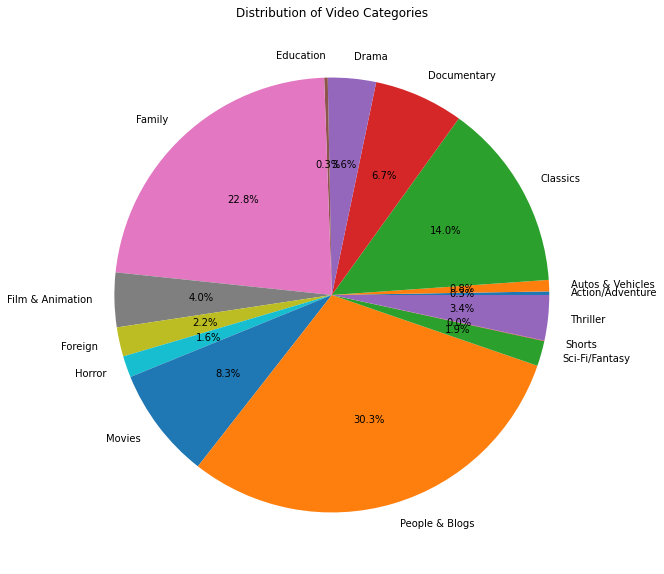

In [20]:
plt.figure(figsize=(10, 10))

plt.title("Distribution of Video Categories")

plt.pie(df_Views_Analysis.view_count, labels=df_Views_Analysis.Video_Category, autopct='%1.1f%%')

plt.show()

### Tương quan giữa các danh mục và số lượt xem

Text(0, 0.5, 'View Count')

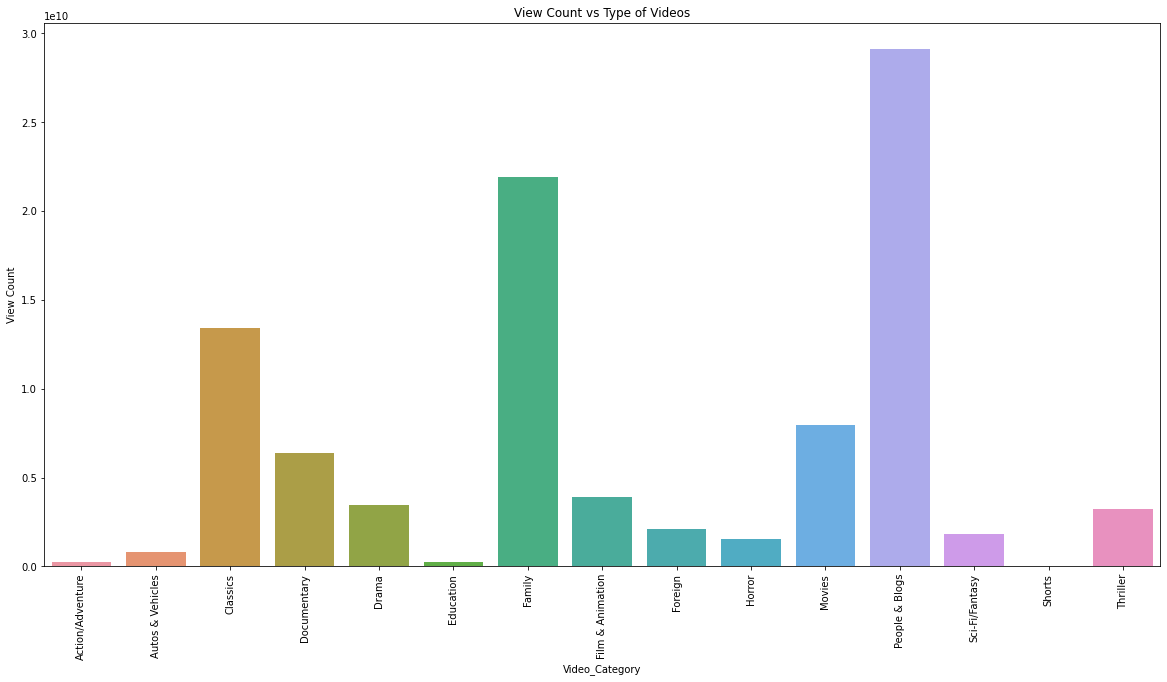

In [21]:
plt.figure(figsize=(20,10))

plt.title("View Count vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.view_count)

plt.ylabel("View Count")

In [24]:
df_Views_Analysis["Response_Percentage"] = ( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) * 100 /df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Comments,Like_Rate,Dislike_Rate,Comment_Rate,Positive_Res,Response_Percentage
0,Action/Adventure,254061862,12449300,66906,635160,0.049001,0.000263,0.002500,0.994654,4.926440
1,Autos & Vehicles,812634440,33806080,293753,2691299,0.041601,0.000361,0.003312,0.991386,4.196208
2,Classics,13433285534,665982283,7138657,47609358,0.049577,0.000531,0.003544,0.989395,5.010844
3,Documentary,6401348953,345930758,5937492,20324394,0.054040,0.000928,0.003175,0.983126,5.496783
4,Drama,3436743114,236863033,2198626,11172455,0.068921,0.000640,0.003251,0.990803,6.956053
5,Education,250803716,10189794,85988,621953,0.040629,0.000343,0.002480,0.991632,4.097141
6,Family,21911711291,1005949441,10745463,59801670,0.045909,0.000490,0.002729,0.989431,4.639961
7,Film & Animation,3891920577,146918160,1287358,9927651,0.037750,0.000331,0.002551,0.991314,3.808030
8,Foreign,2093035112,28474472,1721492,7130958,0.013604,0.000822,0.003407,0.942989,1.442688
9,Horror,1532686364,74351172,1416956,4844882,0.048510,0.000924,0.003161,0.981299,4.943485


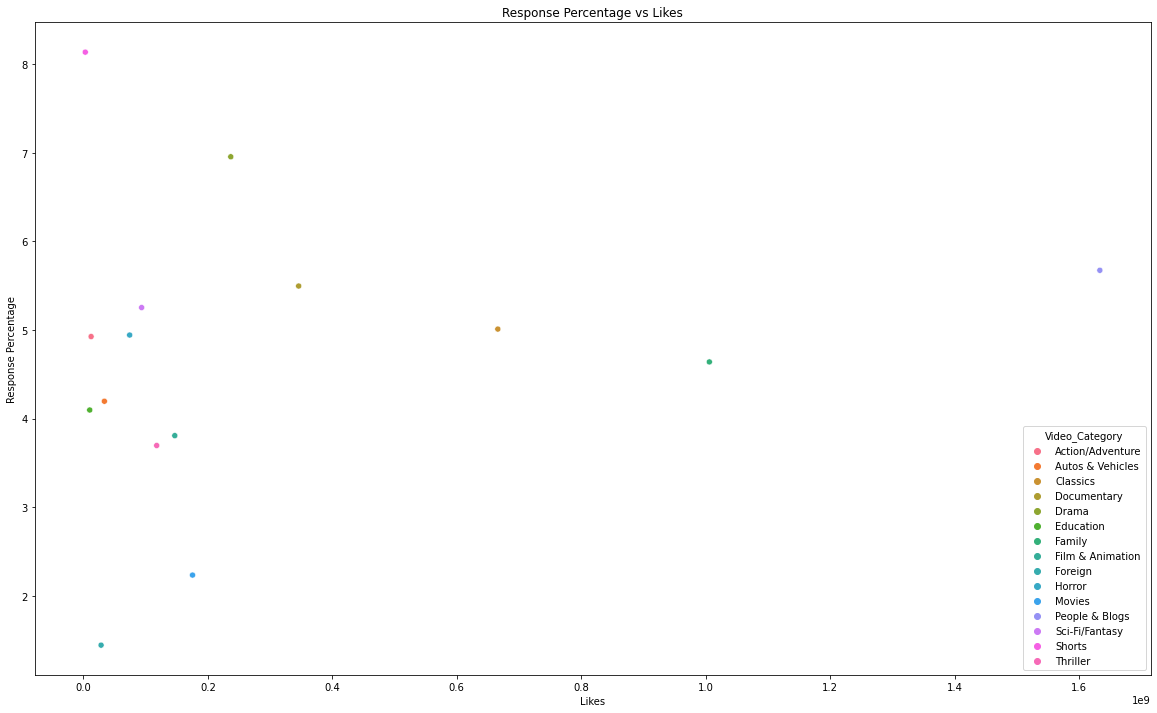

In [25]:
plt.figure(figsize=(20, 12))
plt.title("Response Percentage vs Likes")
sns.scatterplot(x="Likes", y="Response_Percentage", hue="Video_Category", data=df_Views_Analysis)

plt.xlabel("Likes")
plt.ylabel("Response Percentage")

plt.show()

### Số lượng view của của danh mục theo từng năm

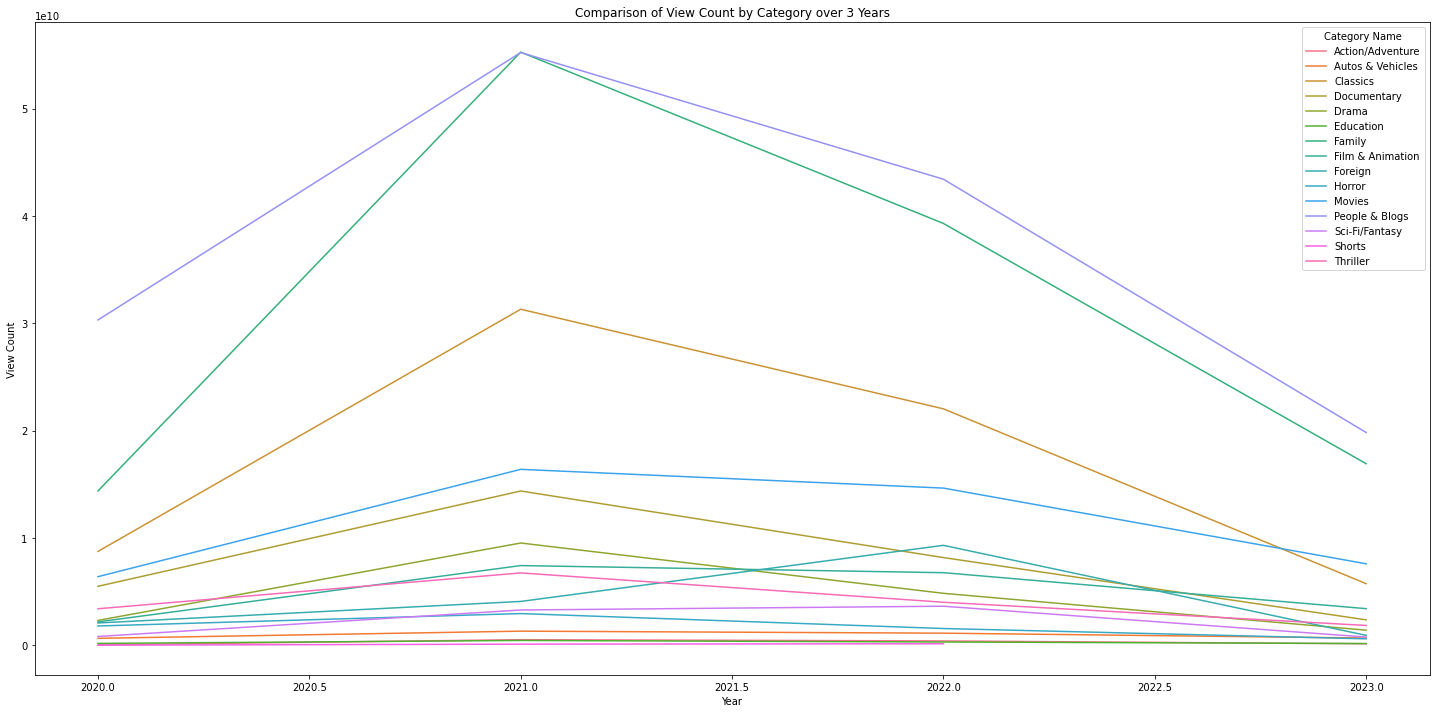

In [27]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['Year'] = df['publishedAt'].dt.year
df['categoryName'] = df['categoryId'].map(category_mapping)

df_category_views = df.groupby(['categoryName', 'Year'])['view_count'].sum().reset_index()

plt.figure(figsize=(25, 12))
sns.lineplot(x='Year', y='view_count', hue='categoryName', data=df_category_views)

plt.title('Comparison of View Count by Category over 3 Years')
plt.xlabel('Year')
plt.ylabel('View Count')

plt.legend(title='Category Name')

plt.show()

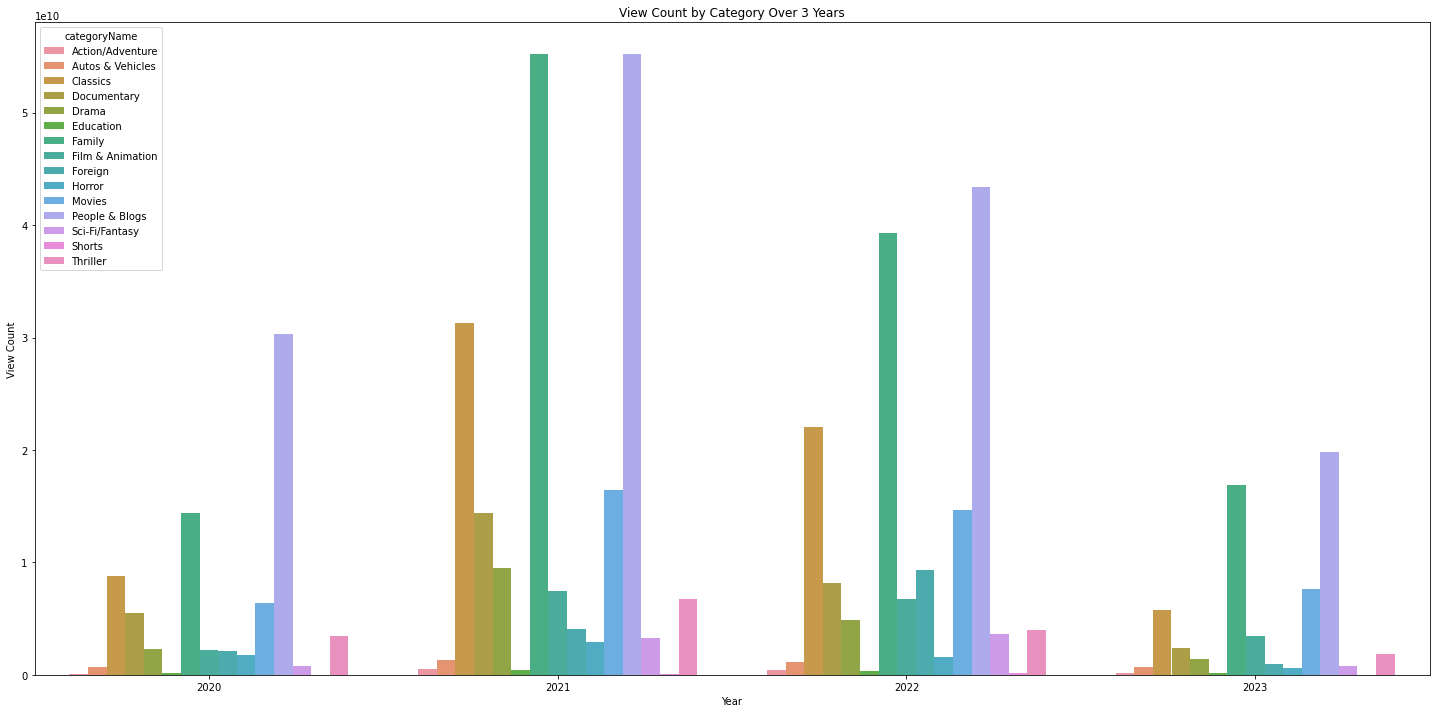

In [28]:
plt.figure(figsize=(25, 12))
sns.barplot(x='Year', y='view_count', hue='categoryName', data=df_category_views)

plt.title('View Count by Category Over 3 Years')
plt.xlabel('Year')
plt.ylabel('View Count')

plt.show()

# Mối liên hệ giữa tiêu đề và video xu hướng

## Việc viết tiêu đề bằng chữ in hoa và ảnh hưởng

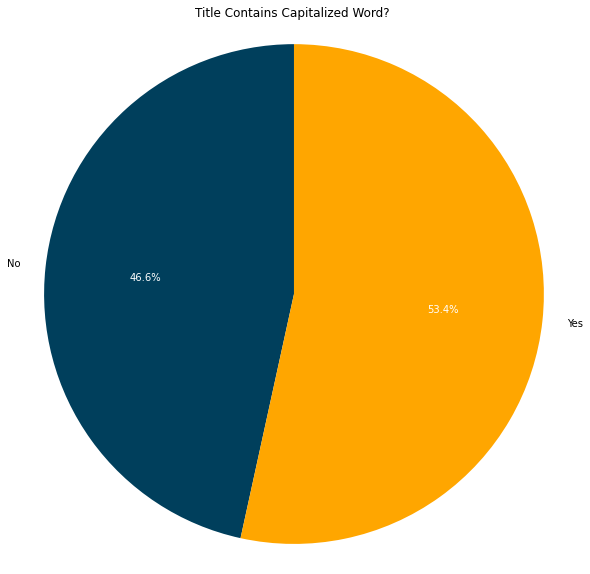

In [29]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots(figsize=(10,10))

_, _, autotexts = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
                         colors=['#003f5c', '#ffa600'], autopct='%1.1f%%', startangle=90)

for autotext in autotexts:
    autotext.set_color('white')

ax.axis('equal')
ax.set_title('Title Contains Capitalized Word?')

plt.show()

## Phân bố số video lên xu hướng theo độ dài tiêu đề

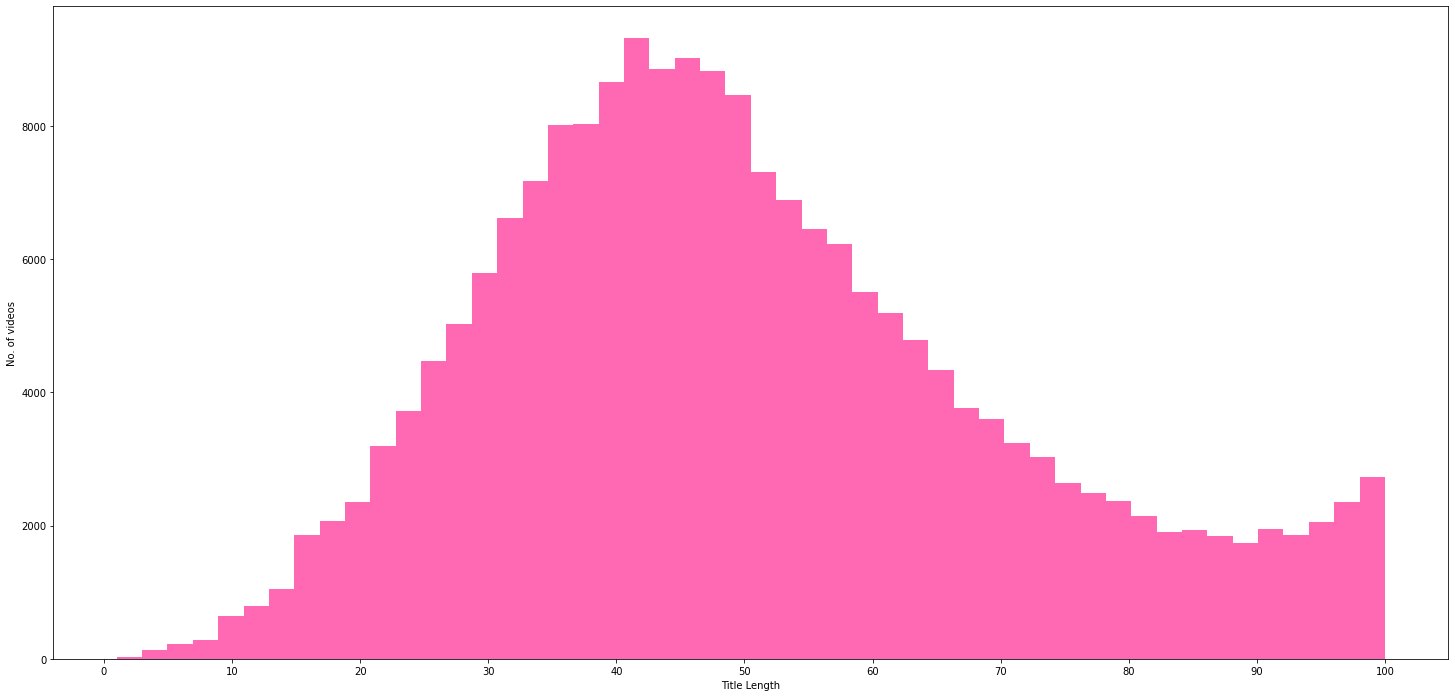

In [31]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(25, 12))

_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color='hotpink', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

plt.show()

## Các từ khóa được xuất hiện nhiều nhất trong các video xu hướng

In [32]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 53578),
 ('-', 49643),
 ('The', 25342),
 ('I', 18408),
 ('the', 18244),
 ('in', 15334),
 ('(Official', 14259),
 ('Video)', 13001),
 ('&', 12961),
 ('to', 12477),
 ('of', 12201),
 ('a', 11439),
 ('and', 8195),
 ('A', 7977),
 ('Trailer', 7913),
 ('Music', 7587),
 ('on', 6598),
 ('Official', 6154),
 ('Minecraft', 6147),
 ('My', 5756),
 ('To', 5656),
 ('Highlights', 5129),
 ('with', 5120),
 ('In', 4852),
 ('at', 4792)]

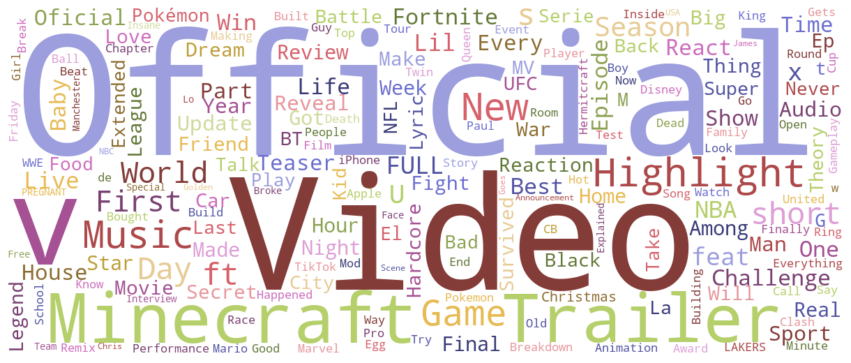

In [33]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## Tương tác của người xem và video xu hướng

### Ma trận tương quan giữa các thuộc tính

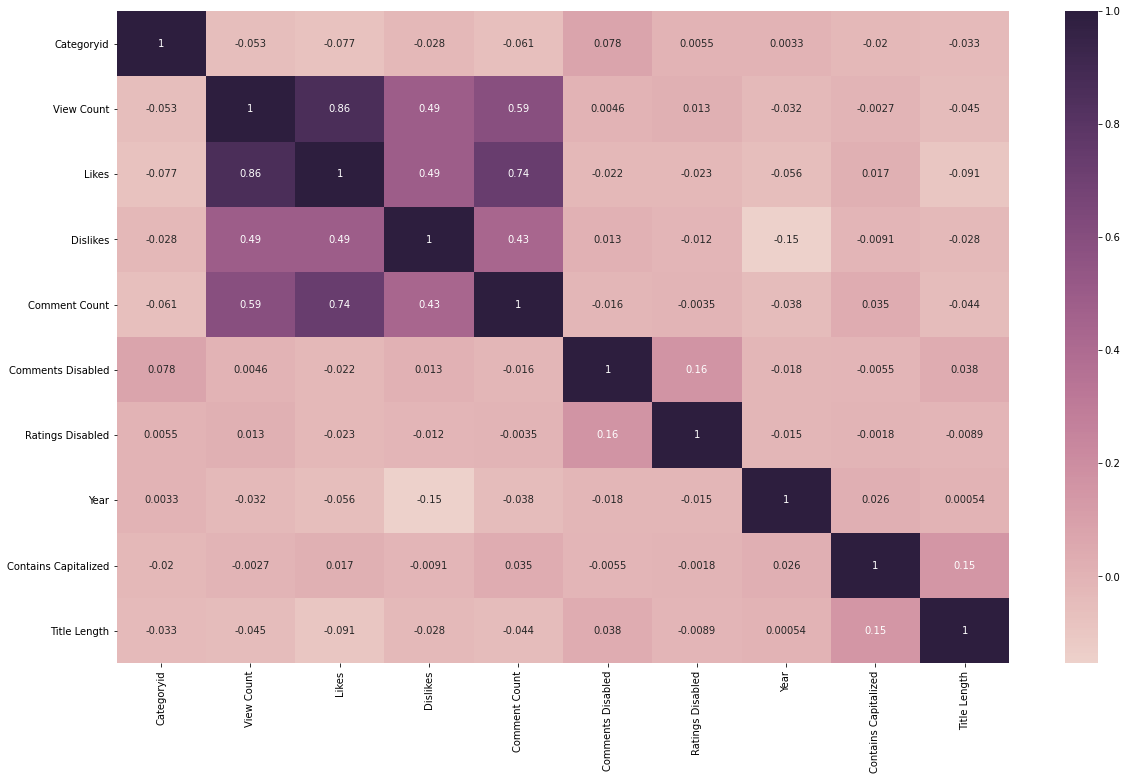

In [34]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(20,12))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

### Lượt xem và lượt thích thực sự có mối tương quan tích cực

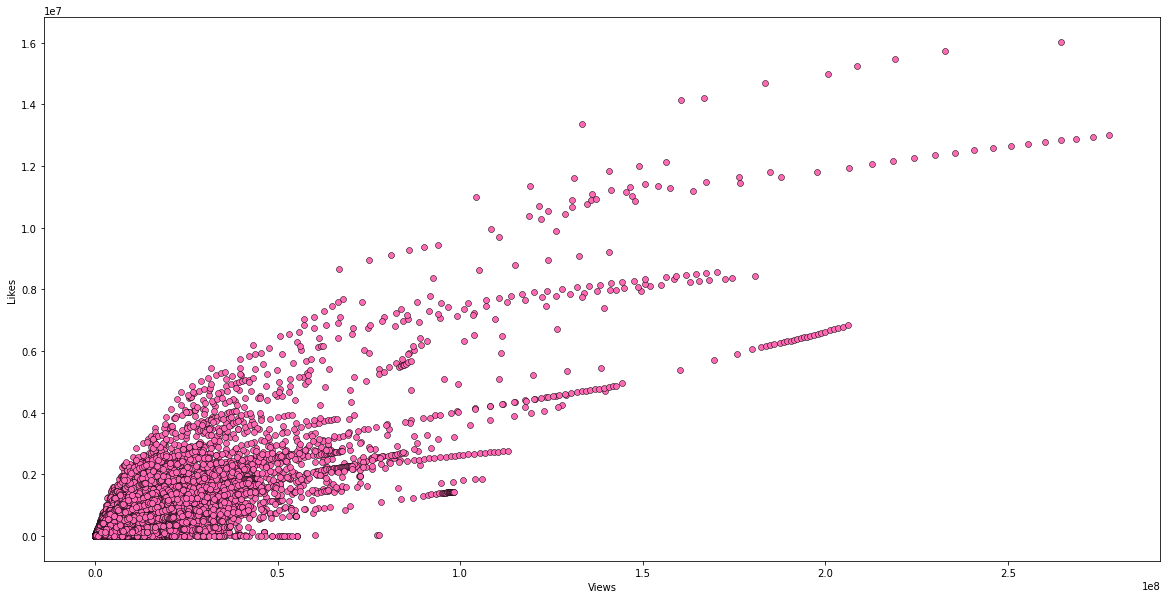

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
_ = plt.scatter(x=df['view_count'], y=df['likes'], color='hotpink', edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

plt.show()

## Số lượt xem và video xu hướng

In [36]:
def views_cat2(views):
    if views <= 100000: return 'less than 100k'
    if views <= 250000: return '250k'
    if views <= 500000: return '500k'
    if views <= 750000: return '750k'
    if views <= 1000000: return '1m'
    if views <= 1500000: return '1.5m'
    if views <= 2000000: return '2m'
    if views <= 3000000: return '3m'
    if views <= 4000000: return '4m'
    if views <= 5000000: return '5m'
    if views <= 6000000: return '6m'
    if views <= 7000000: return '7m'
    if views <= 8000000: return '8m'
    if views <= 10000000: return '10m'
    return '15m' if views <= 15000000 else 'more than 15m'

df6 = df
df6 = df.assign(view_cat= df6.view_count.apply(views_cat2))
df6.sample(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,Video_Category,Year,categoryName,contains_capitalized,title_length,view_cat
90233,oq4B8eA_gD0,What would your husband do if he was stranded ...,2021-10-29 17:44:55+00:00,UC2UBi_g6eXjaLgsh26Kuzzw,TheCampisis,24,2021-10-31T00:00:00Z,[None],751191,21872,...,https://i.ytimg.com/vi/oq4B8eA_gD0/default.jpg,False,False,We stream on Twitch!!! Deese Twitch! https://w...,Family,2021,Family,False,78,1m
22680,y-CkY9U2114,Ferencvároi vs. Barcelona: Extended Highlights...,2020-12-02 22:21:21+00:00,UCET00YnetHT7tOpu12v8jxg,Champions League on CBS Sports,17,2020-12-05T00:00:00Z,Barcelona|Ferencvárosi TC|Ferencvárosi TC vs. ...,518408,5280,...,https://i.ytimg.com/vi/y-CkY9U2114/default.jpg,False,False,"If you can cope without injured superstars, re...",Movies,2020,Movies,True,66,750k
151759,DFmnbo_Cegg,Manchester City v. Nottingham Forest | PREMIER...,2022-08-31 22:25:06+00:00,UCqZQlzSHbVJrwrn5XvzrzcA,NBC Sports,17,2022-09-05T00:00:00Z,nbc sports|nbc|nbcsn|premier|league|premier le...,896396,12715,...,https://i.ytimg.com/vi/DFmnbo_Cegg/default.jpg,False,False,Manchester City put Nottingham Forest to the s...,Movies,2022,Movies,True,89,1m
59750,0qfHzDfG7io,Genius Inventions And Gadgets You've Never See...,2021-06-02 19:35:01+00:00,UCpB959t8iPrxQWj7G6n0ctQ,SSSniperWolf,24,2021-06-08T00:00:00Z,sssniperwolf|sniper wolf|reacting|reaction|fun...,5832997,174697,...,https://i.ytimg.com/vi/0qfHzDfG7io/default.jpg,False,False,Genius Inventions And Gadgets You've Never See...,Family,2021,Family,False,54,6m
104313,7z6y4ajPCQM,Last To Take Hand Off Supercar Keeps It!,2022-01-08 17:00:10+00:00,UCF0_hwTeQ73IhJuEtsUbEtA,Sofie Dossi,24,2022-01-11T00:00:00Z,sofie dossi|america's got talent 2016|agt|cont...,559639,27105,...,https://i.ytimg.com/vi/7z6y4ajPCQM/default.jpg,False,False,This week I gathered all my friends and played...,Family,2022,Family,False,40,750k


In [40]:
df7 = df6.groupby("view_cat").count()
df7 = df7.assign(respond_cat=df7.index)
df7

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,Video_Category,Year,categoryName,contains_capitalized,title_length,respond_cat
view_cat,,,,,,,,,,,,,,,,,,,,,
1.5m,27041,27041,27041,27041,27041,27041,27041,27041,27041,27041,...,27041,27041,27041,26544,27041,27041,27041,27041,27041,1.5m
10m,2790,2790,2790,2790,2790,2790,2790,2790,2790,2790,...,2790,2790,2790,2727,2790,2790,2790,2790,2790,10m
15m,3144,3144,3144,3144,3144,3144,3144,3144,3144,3144,...,3144,3144,3144,3079,3144,3144,3144,3144,3144,15m
1m,20925,20925,20925,20925,20925,20925,20925,20925,20925,20925,...,20925,20925,20925,20520,20925,20925,20925,20925,20925,1m
250k,14259,14259,14259,14259,14259,14259,14259,14259,14259,14259,...,14259,14259,14259,13970,14259,14259,14259,14259,14259,250k
2m,17069,17069,17069,17069,17069,17069,17069,17069,17069,17069,...,17069,17069,17069,16694,17069,17069,17069,17069,17069,2m
3m,19078,19078,19078,19078,19078,19078,19078,19078,19078,19078,...,19078,19078,19078,18690,19078,19078,19078,19078,19078,3m
4m,9892,9892,9892,9892,9892,9892,9892,9892,9892,9892,...,9892,9892,9892,9667,9892,9892,9892,9892,9892,4m
500k,39083,39083,39083,39083,39083,39083,39083,39083,39083,39083,...,39083,39083,39083,38290,39083,39083,39083,39083,39083,500k


Text(0.5, 0, 'Views Count')

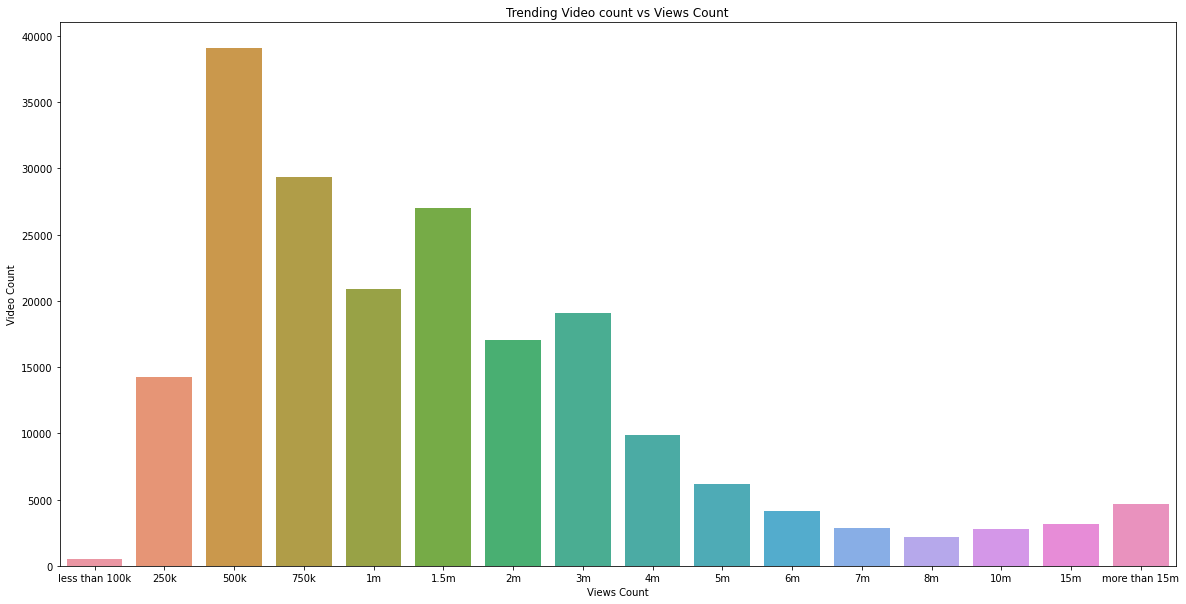

In [41]:
plt.figure(figsize=(20,10))

sorter = ['less than 100k','250k','500k','750k','1m','1.5m','2m','3m','4m','5m','6m','7m','8m','10m','15m','more than 15m']

plt.title("Trending Video count vs Views Count")

sns.barplot(x=df7.respond_cat, y=df7.video_id, order = sorter)

plt.ylabel("Video Count")
plt.xlabel("Views Count")

## Số bình luận và video xu hướng

### Lượng bình luận và số lượt xem không có nhiều sự tương quan

In [42]:
df_Views_Analysis["Response_Percentage"] = ( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) * 100 /df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Comments,Like_Rate,Dislike_Rate,Comment_Rate,Positive_Res,Response_Percentage
0,Action/Adventure,254061862,12449300,66906,635160,0.049001,0.000263,0.002500,0.994654,4.926440
1,Autos & Vehicles,812634440,33806080,293753,2691299,0.041601,0.000361,0.003312,0.991386,4.196208
2,Classics,13433285534,665982283,7138657,47609358,0.049577,0.000531,0.003544,0.989395,5.010844
3,Documentary,6401348953,345930758,5937492,20324394,0.054040,0.000928,0.003175,0.983126,5.496783
4,Drama,3436743114,236863033,2198626,11172455,0.068921,0.000640,0.003251,0.990803,6.956053
5,Education,250803716,10189794,85988,621953,0.040629,0.000343,0.002480,0.991632,4.097141
6,Family,21911711291,1005949441,10745463,59801670,0.045909,0.000490,0.002729,0.989431,4.639961
7,Film & Animation,3891920577,146918160,1287358,9927651,0.037750,0.000331,0.002551,0.991314,3.808030
8,Foreign,2093035112,28474472,1721492,7130958,0.013604,0.000822,0.003407,0.942989,1.442688
9,Horror,1532686364,74351172,1416956,4844882,0.048510,0.000924,0.003161,0.981299,4.943485


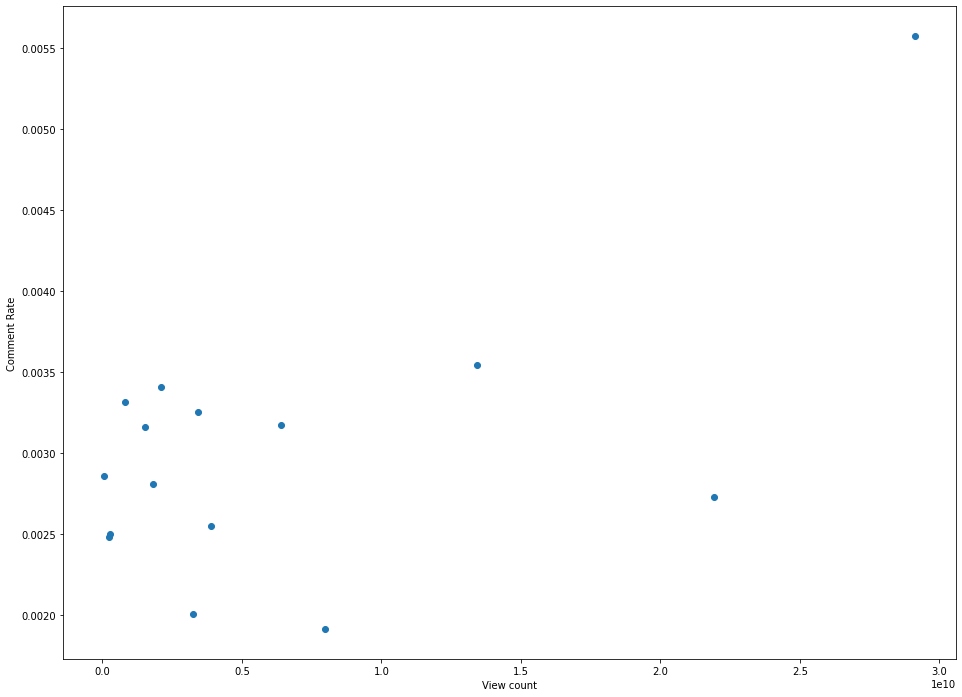

In [43]:
df_Views_Analysis.sort_values(by='view_count', inplace=True)
plt.figure(figsize=(16, 12))
plt.scatter(df_Views_Analysis['view_count'], df_Views_Analysis['Comment_Rate'])

plt.xlabel('View count')
plt.ylabel('Comment Rate')

plt.show()

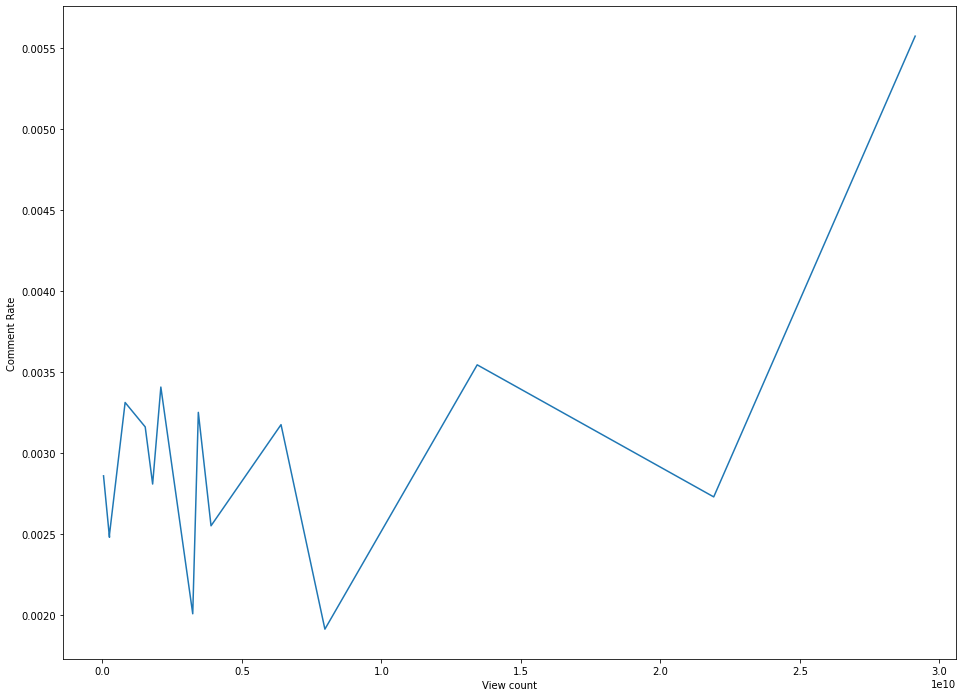

In [44]:
df_Views_Analysis.sort_values(by='view_count', inplace=True)
plt.figure(figsize=(16, 12))

plt.plot(df_Views_Analysis['view_count'], df_Views_Analysis['Comment_Rate'])

plt.xlabel('View count')
plt.ylabel('Comment Rate')

plt.show()

## Tỉ lệ phản hồi tích cực và video xu hướng

In [45]:
df5 = df.assign(respond_rate=lambda x: x.likes/(x.dislikes + x.likes))
def like_rate_cat(respond_rate):
    lst = np.arange(0, 1.1, 0.05).tolist()
    for i in lst:
        if respond_rate <= i:
            return i

df5 = df5.assign(respond_cat= df5.respond_rate.apply(like_rate_cat))
df5

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,Video_Category,Year,categoryName,contains_capitalized,title_length,respond_rate,respond_cat
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Documentary,2020,Documentary,True,34,0.964027,1.00
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,...,False,False,"While running her own modding shop, Ramya Pare...",Classics,2020,Classics,False,60,0.981315,1.00
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,...,False,False,I left youtube for a month and this is what ha...,Family,2020,Family,True,53,0.992627,1.00
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,...,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,People & Blogs,2020,People & Blogs,True,56,0.926076,0.95
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,...,False,False,Transforming The LaBrant Family's empty white ...,Horror,2020,Horror,True,55,0.979387,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203184,9i4CK-Tz3mo,Martial And Garnacho Scoring Again! ⚽️🙌 | Man ...,2023-05-13 21:00:06+00:00,UC6yW44UGJJBvYTlfC7CRg2Q,Manchester United,17,2023-05-20T00:00:00Z,manchester united|mufc|man utd|manutd|mu|ggmu|...,2737767,61930,...,False,False,Watch the short highlights from Manchester Uni...,Movies,2023,Movies,False,73,1.000000,1.00
203185,ctsEON0cxOw,Minecraft's Funniest Inventions...,2023-05-13 22:22:27+00:00,UC5p_l5ZeB_wGjO_yDXwiqvw,TommyInnit,20,2023-05-20T00:00:00Z,tommyinnit|minecraft|mine craft|dream minecraf...,1689836,121515,...,False,False,LIMITED MERCH OUT NOW https://tommyinnit.store...,Classics,2023,Classics,False,34,1.000000,1.00
203186,Ce4OElNzXbo,Stray Kids ＜★★★★★ (5-STAR)＞ UNVEIL : TRACK 3 죽...,2023-05-14 14:59:56+00:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2023-05-20T00:00:00Z,JYP Entertainment|Stray Kids|스트레이 키즈|SKZ|스키즈|방...,2247963,440110,...,False,False,Stray Kids(스트레이 키즈) ＜★★★★★ (5-STAR)＞ UNVEIL : ...,People & Blogs,2023,People & Blogs,True,59,1.000000,1.00
203187,q49UW_RSr3c,"Yailin La Mas Viral, Shadow Blow - Solo Tú y Y...",2023-05-11 18:00:07+00:00,UCZUl_haJHBu7KF6dU8iwC_g,Yailin La Mas Viral,10,2023-05-20T00:00:00Z,Yailin La Mas Viral|Solo tu y yo|Yailin Solo T...,6911796,344228,...,False,False,"Yailin La Mas Viral, Shadow Blow - Solo Tú y Y...",People & Blogs,2023,People & Blogs,False,63,1.000000,1.00


In [46]:
df5_count = df5.groupby("respond_cat").count()
df5_count = df5_count.assign(respond_cat=df5_count.index)
df5_count

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,Video_Category,Year,categoryName,contains_capitalized,title_length,respond_rate,respond_cat
respond_cat,,,,,,,,,,,,,,,,,,,,,
0.10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0.10
0.15,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0.15
0.20,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,0.20
0.25,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,0.25
0.30,30,30,30,30,30,30,30,30,30,30,...,30,30,27,30,30,30,30,30,30,0.30
0.35,66,66,66,66,66,66,66,66,66,66,...,66,66,57,66,66,66,66,66,66,0.35
0.40,52,52,52,52,52,52,52,52,52,52,...,52,52,50,52,52,52,52,52,52,0.40
0.45,94,94,94,94,94,94,94,94,94,94,...,94,94,93,94,94,94,94,94,94,0.45
0.50,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,0.50


Text(0, 0.5, 'Positive Respond Rate')

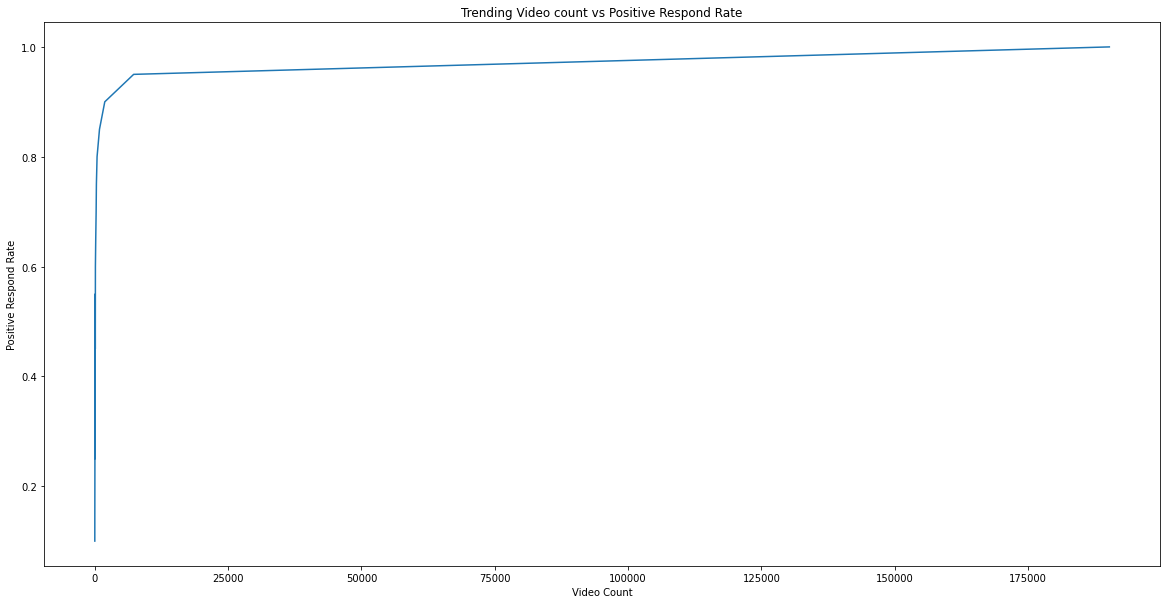

In [47]:
plt.figure(figsize=(20,10))

plt.title("Trending Video count vs Positive Respond Rate")

sns.lineplot(x=df5_count.video_id, y=df5_count.respond_cat)

plt.xlabel("Video Count")
plt.ylabel("Positive Respond Rate")

## Thời điểm đăng video và video xu hướng

In [50]:
import datetime

df["publishing_day"] = df["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(str(x)[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x: str(x)[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)


### Khung giờ đăng video có thể ảnh hưởng đến lượt xem khả năng xuất hiện trên trang xu hướng

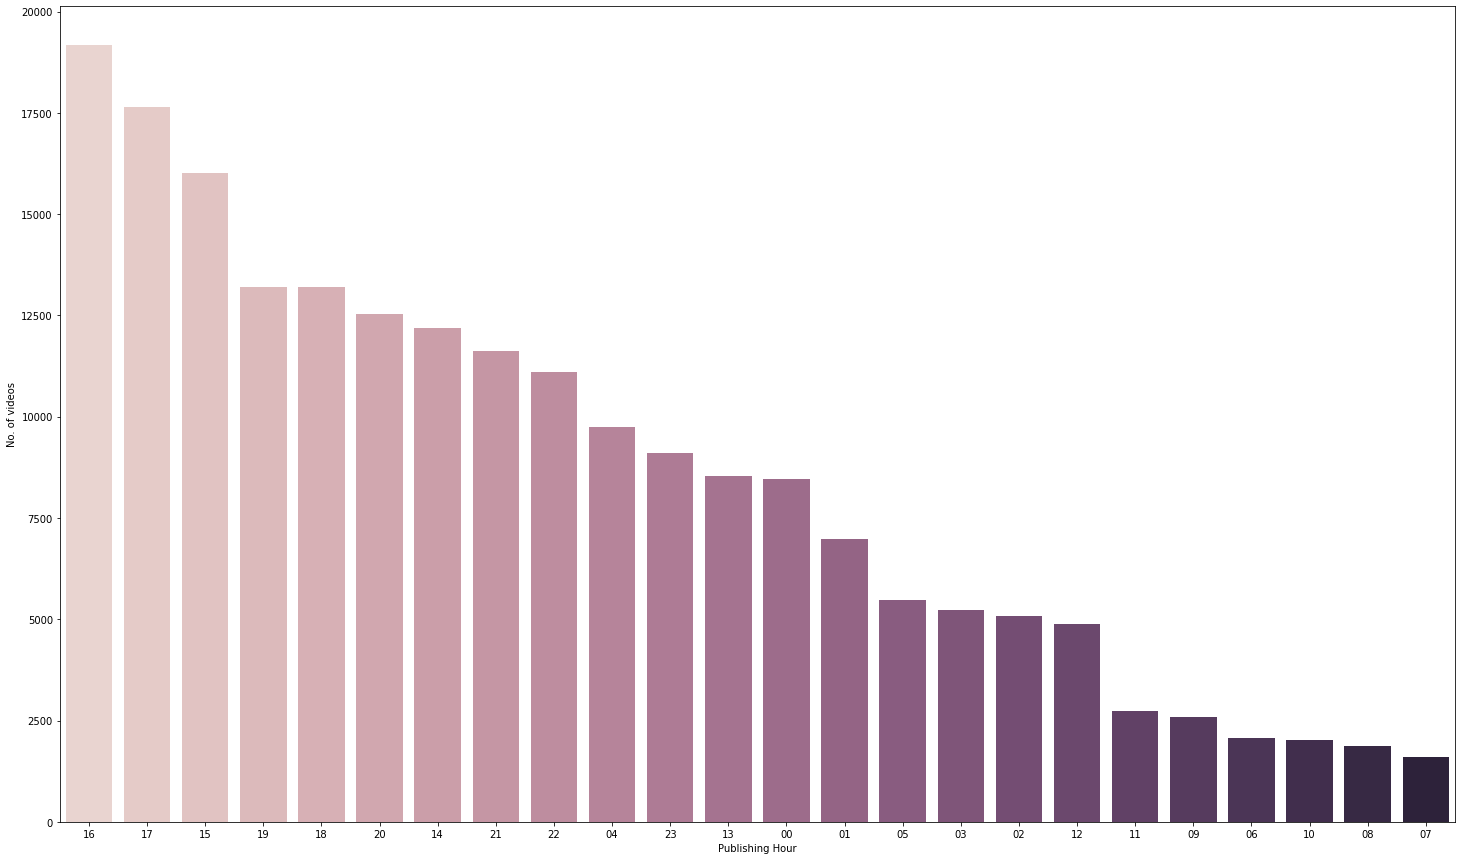

In [51]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots(figsize=(25,15))
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

### Ngày đăng video trong tuần

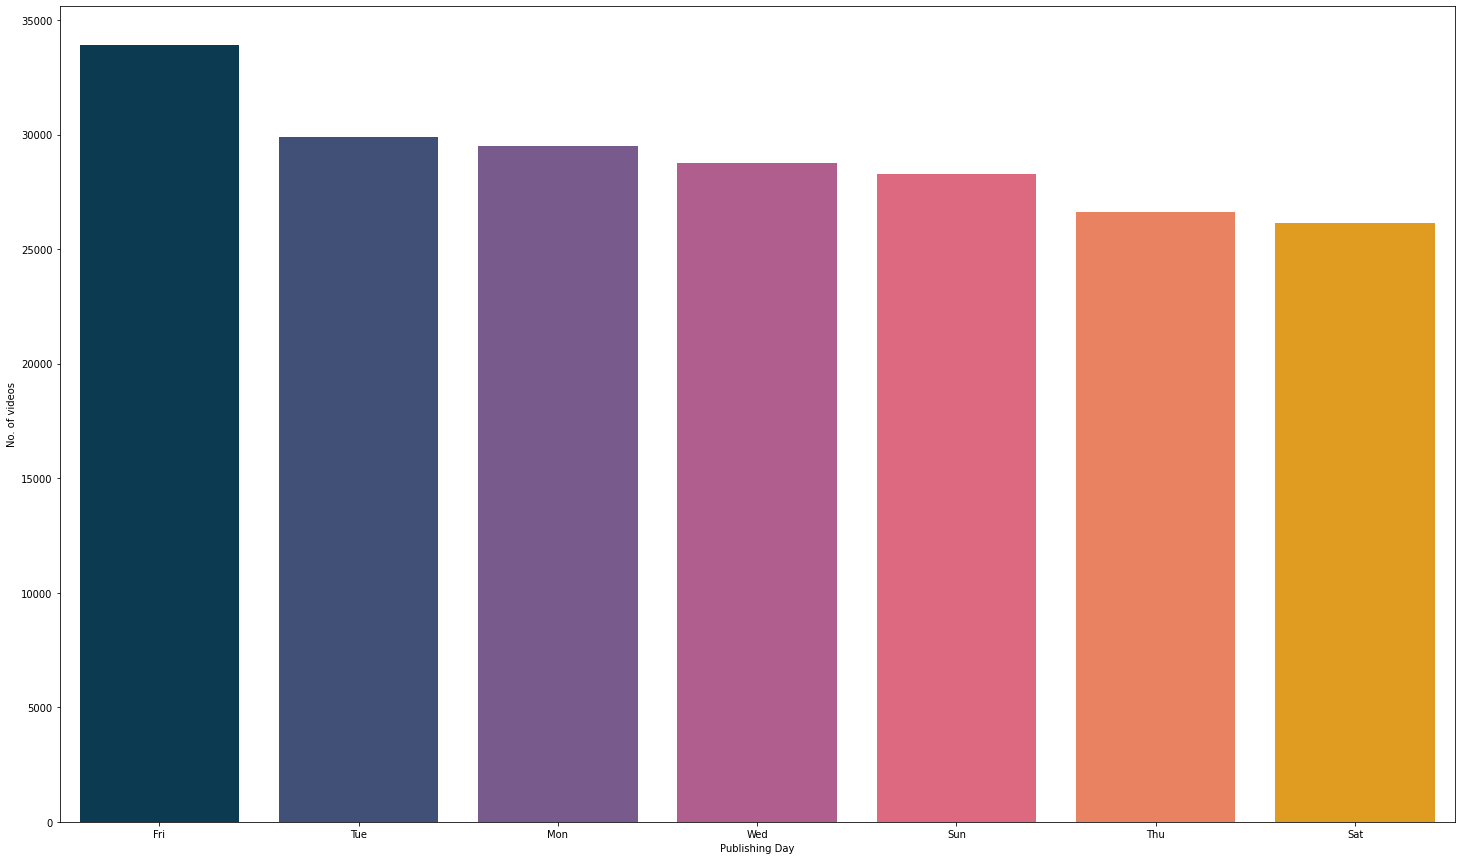

In [52]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots(figsize=(25,15))
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")